In [309]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta


# Load the Airbnb, Inc. Stock Market Analysis dataset
airbnb_df = pd.read_csv("AirBnB.csv") 

In [310]:
# Step 1: Function to check head, tail, data types, and summary statistics
def check_data(df):
    """
    Given a data frame, this function checks the head, tail, data types, and summary statistics of different features.
    Input: Data frame
    Output: 
    """
    print("Head:\n\n", df.head())
    print("\nTail:\n\n", df.tail())
    print("\nData Types:\n\n", df.dtypes)
    print("\nSummary Statistics:\n", df.describe())

# Apply the check_data function on the Airbnb, Inc. Stock Market Analysis dataset
check_data(airbnb_df)



Head:

          Date        Open        High         Low       Close   Adj Close  \
0  12/11/2020  146.550003  151.500000  135.100006  139.250000  139.250000   
1  12/14/2020  135.000000  135.300003  125.160004  130.000000  130.000000   
2  12/15/2020  126.690002  127.599998  121.500000  124.800003  124.800003   
3  12/16/2020  125.830002  142.000000  124.910004  137.990005  137.990005   
4  12/17/2020  143.000000  152.449997  142.669998  147.050003  147.050003   

     Volume  
0  26980800  
1  16966100  
2  10914400  
3  20409600  
4  15054700  

Tail:

           Date        Open        High         Low       Close   Adj Close  \
449  9/26/2022  101.779999  105.360001  101.559998  103.230003  103.230003   
450  9/27/2022  106.040001  108.169998  104.139999  106.370003  106.370003   
451  9/28/2022  106.700996  111.129997  105.779999  110.690002  110.690002   
452  9/29/2022  109.190002  109.474998  105.169998  106.660004  106.660004   
453  9/30/2022  104.760002  109.080002  104.73

In [311]:
# Step 2: Function to drop a column
def drop_column(df, column_name):
    """
    Given the name of a column, this function drops that column from the data frame.
    Input: Data frame, Column name
    Output: Data frame without the specified column
    """
    df.drop(column_name, axis=1, inplace=True)
    return df

# Apply the drop_column function on unnecessary columns from the Airbnb, Inc. Stock Market Analysis dataset
airbnb_df = drop_column(airbnb_df, "Close")
airbnb_df = drop_column(airbnb_df, "Low")
airbnb_df = drop_column(airbnb_df, "High")




In [312]:
print(airbnb_df)

           Date        Open   Adj Close    Volume
0    12/11/2020  146.550003  139.250000  26980800
1    12/14/2020  135.000000  130.000000  16966100
2    12/15/2020  126.690002  124.800003  10914400
3    12/16/2020  125.830002  137.990005  20409600
4    12/17/2020  143.000000  147.050003  15054700
..          ...         ...         ...       ...
449   9/26/2022  101.779999  103.230003   5278800
450   9/27/2022  106.040001  106.370003   5081000
451   9/28/2022  106.700996  110.690002   4518200
452   9/29/2022  109.190002  106.660004   4259500
453   9/30/2022  104.760002  105.040001   4747800

[454 rows x 4 columns]


In [313]:
# Step 3: Function to rename a column
def rename_column(df, old_name, new_name):
    """
    Given the old and new name of a column, this function renames the column with the new name.
    Input: Data frame, Old name, New name
    Output: Data frame with the specified column renamed
    """
    df.rename(columns={old_name: new_name}, inplace=True)
    return df

# Apply the rename_column function on columns that need to be renamed in the Airbnb, Inc. Stock Market Analysis dataset
airbnb_df = rename_column(airbnb_df, "Date", "DateofListing")
airbnb_df = rename_column(airbnb_df, "Open", "PriceWhenMarketOpens")
airbnb_df = rename_column(airbnb_df, "Adj Close", "ModifiedClosingPrice")
airbnb_df = rename_column(airbnb_df, "Volume", " DailyStocksSold")



In [314]:
print(airbnb_df)

    DateofListing  PriceWhenMarketOpens  ModifiedClosingPrice  \
0      12/11/2020            146.550003            139.250000   
1      12/14/2020            135.000000            130.000000   
2      12/15/2020            126.690002            124.800003   
3      12/16/2020            125.830002            137.990005   
4      12/17/2020            143.000000            147.050003   
..            ...                   ...                   ...   
449     9/26/2022            101.779999            103.230003   
450     9/27/2022            106.040001            106.370003   
451     9/28/2022            106.700996            110.690002   
452     9/29/2022            109.190002            106.660004   
453     9/30/2022            104.760002            105.040001   

      DailyStocksSold  
0            26980800  
1            16966100  
2            10914400  
3            20409600  
4            15054700  
..                ...  
449           5278800  
450           5081000  
451

In [315]:
# Step 4: Function to remove duplicate and null/missing values
def clean_data(df):
    """
    This function checks if a data frame has any duplicate values, prints out the number of duplicate rows, number of rows for each column, and finally drops those duplicate rows.
    It then checks for null and missing values, and drops or fills them with mean values. The return of this function is a data frame without any duplicate values or null/missing values.
    Input: Data frame
    Output: Cleaned data frame
    """
    # Check for duplicates and drop them
   # Check for duplicate rows
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"Number of duplicate rows: {num_duplicates}")
        print("Dropping duplicate rows...")
        df.drop_duplicates(inplace=True)

    # Check for null/missing values
    num_missing = df.isnull().sum().sum()
    if num_missing > 0:
        print(f"Number of missing values: {num_missing}")
        print("Filling missing values with mean...")
        df.fillna(df.mean(), inplace=True)
    # Print number of rows for each column
    print("Number of rows per column:")
    print(df.count())

    # Return cleaned dataframe
    return df
   

# Apply the clean_data function on the Airbnb, Inc. Stock Market Analysis dataset
airbnb_df = clean_data(airbnb_df)

Number of rows per column:
DateofListing           454
PriceWhenMarketOpens    454
ModifiedClosingPrice    454
 DailyStocksSold        454
dtype: int64


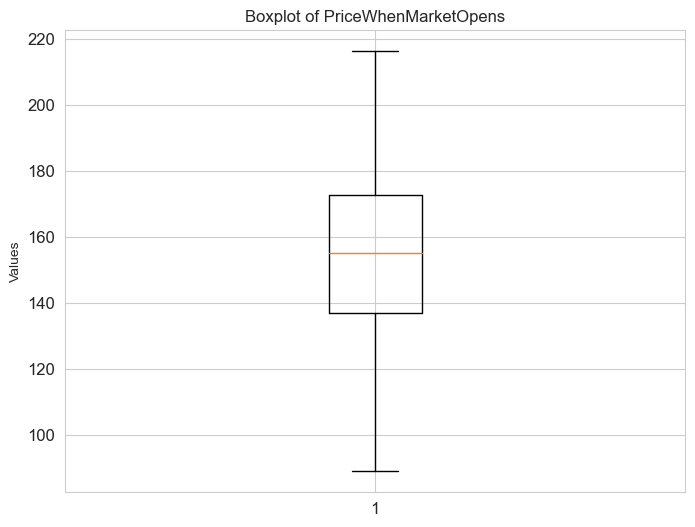

In [316]:
#Step 5: Function to create boxplots for a given feature

import matplotlib.pyplot as plt

def create_boxplot(df, feature_name):
    
    """
    This function creates a boxplot for a given feature (column) in the input dataframe.
    Input:
    - df: pandas DataFrame
    - feature_name: str, name of the column in the dataframe

    Output:
    - None (the function displays the boxplot)
    """
    plt.figure(figsize=(8,6))
    plt.boxplot(df[feature_name])
    plt.title(f"Boxplot of {feature_name}")
    plt.ylabel("Values")
    plt.show()

# Apply the create_boxplot function on the Airbnb, Inc. Stock Market Analysis dataset
create_boxplot(airbnb_df, "PriceWhenMarketOpens")

In [317]:
#Step 6: Function to apply lower and upper limits on a dataframe
def apply_limits(df, feature_name, lower_limit, upper_limit):
    """
    This function applies lower and upper limits on a given feature in the input dataframe.
    It returns an updated dataframe after applying the limits and prints out the old and new shape of the dataframe.
    Input:
    - df: pandas DataFrame
    - feature_name: str, name of the column in the dataframe
    - lower_limit: float, lower limit for the feature
    - upper_limit: float, upper limit for the feature

    Output:
    - pandas DataFrame (updated dataframe after applying limits)
    """
    old_shape = df.shape
    df = df[(df[feature_name] >= lower_limit) & (df[feature_name] <= upper_limit)]
    new_shape = df.shape
    print(f"Old shape: {old_shape} | New shape: {new_shape}")
    return df

# Apply the apply_limits function on the Airbnb, Inc. Stock Market Analysis dataset
airbnb_df = apply_limits(airbnb_df, "ModifiedClosingPrice", 50, 250)

Old shape: (454, 4) | New shape: (454, 4)


**EVALUATING FEATURES**

In [318]:


# Define Evaluation Function
def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train) # Fit the model on the training data
    train_preds = model.predict(X_train) # Make predictions on the training data
    test_preds = model.predict(X_test) # Make predictions on the testing data
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds)) # Calculate RMSE for training data
    train_r2 = r2_score(y_train, train_preds) # Calculate R^2 for training data
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds)) # Calculate RMSE for testing data
    test_r2 = r2_score(y_test, test_preds) # Calculate R^2 for testing data
    return train_rmse, train_r2, test_rmse, test_r2, test_preds



**FEATURE SCALLING**

In [319]:
# Define Features and Target Variable
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Adj Close'

**DATASET SPLITTING**

In [320]:
# Split Features and Target Variable for Training and Testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


*****MODELLING*****

In [321]:
# Linear Regression
lin_reg = LinearRegression() # Create a linear regression model
lin_train_rmse, lin_train_r2, lin_test_rmse, lin_test_r2, lin_test_preds = evaluate(lin_reg, X_train, y_train, X_test, y_test) # Evaluate the linear regression model
# Print Evaluation Metrics
print("Linear Regression Evaluation Metrics:")
print("Train RMSE:", lin_train_rmse)
print("Train R^2:", lin_train_r2)
print("Test RMSE:", lin_test_rmse)
print("Test R^2:", lin_test_r2)


Linear Regression Evaluation Metrics:
Train RMSE: 4.693518635111454e-09
Train R^2: 1.0
Test RMSE: 3.732984296935732e-09
Test R^2: 1.0


In [322]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42) # Create a random forest regression model with 100 trees
rf_train_rmse, rf_train_r2, rf_test_rmse, rf_test_r2, rf_test_preds = evaluate(rf_reg, X_train, y_train, X_test, y_test) # Evaluate the random forest regression model
print("\nRandom Forest Regression Evaluation Metrics:")
print("Train RMSE:", rf_train_rmse)
print("Train R^2:", rf_train_r2)
print("Test RMSE:", rf_test_rmse)
print("Test R^2:", rf_test_r2)



Random Forest Regression Evaluation Metrics:
Train RMSE: 0.28638134634466644
Train R^2: 0.9997926922403705
Test RMSE: 8.05682284293623
Test R^2: 0.34229638417130215


In [323]:
# Convert Dates for Plotting
train_dates = (train_data['Date'] - datetime(2020, 1, 1)) / timedelta(seconds=1)
test_dates = (test_data['Date'] - datetime(2020, 1, 1)) / timedelta(seconds=1)


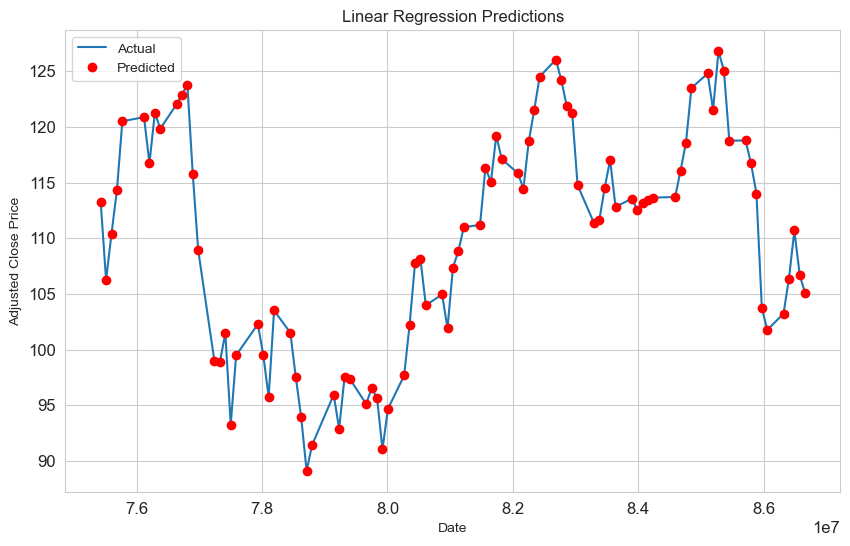

In [334]:
# Plot Linear Regression Predictions
plt.figure(figsize=(10, 6))

# Plot actual values as blue dots
plt.plot(test_dates, y_test, label='Actual')

# Plot predicted values as orange dots
plt.plot(test_dates, lin_test_preds, 'ro', label='Predicted')

plt.title('Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


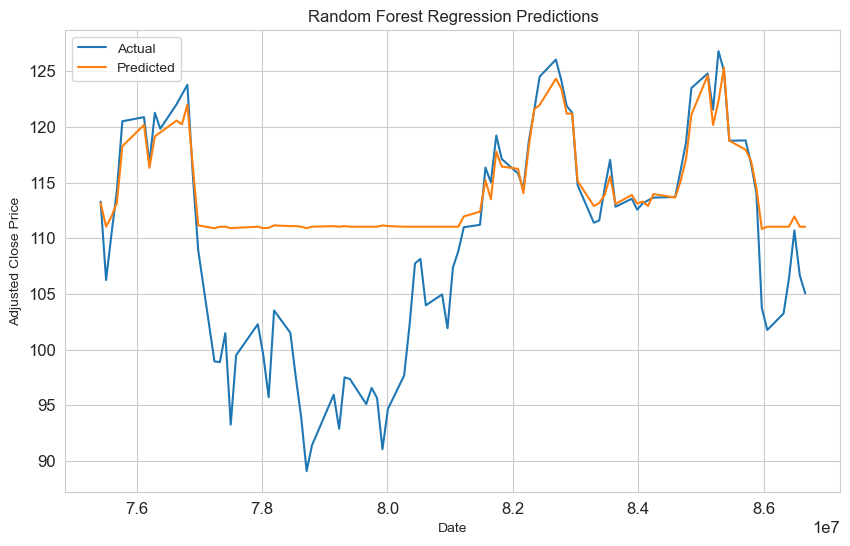

In [325]:
# Plot Random Forest Regression Predictions
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, rf_test_preds, label='Predicted')
plt.title('Random Forest Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()




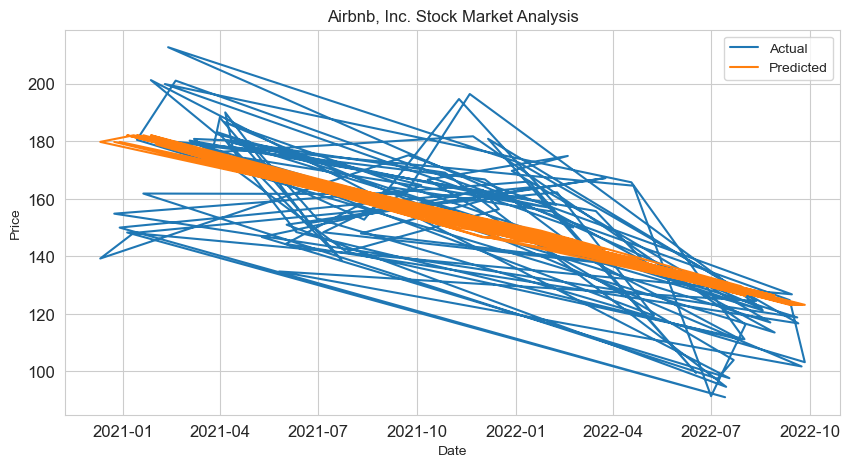

In [326]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(test['Date'], test['Close'], label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Airbnb, Inc. Stock Market Analysis')
plt.legend()
plt.show()


**Scatter plot of actual vs. predicted prices for Linear Regression model**

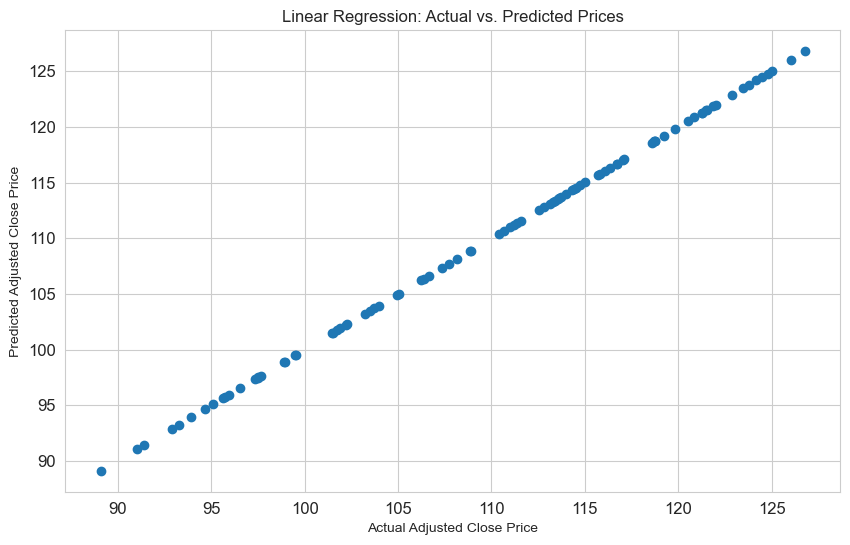

In [327]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_test_preds)
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Adjusted Close Price')
plt.ylabel('Predicted Adjusted Close Price')
plt.show()


**Scatter plot of actual vs. predicted prices for Random Forest Regression model:**

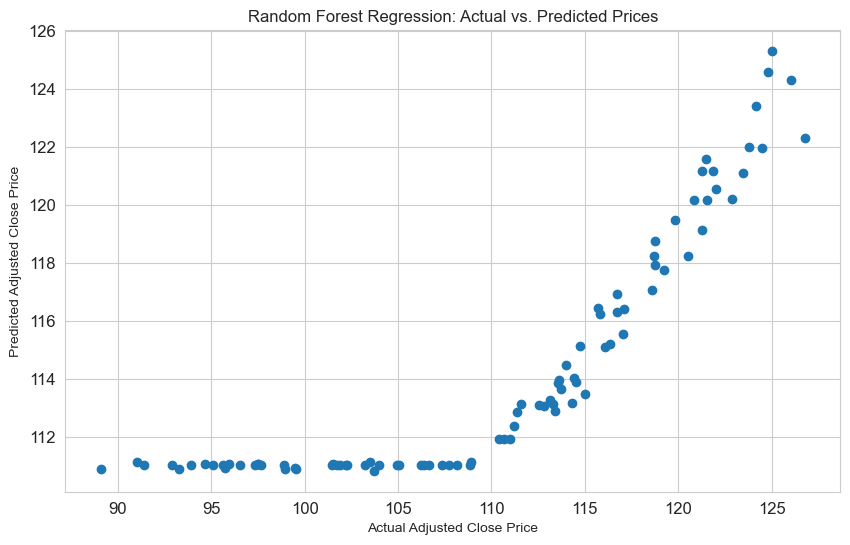

In [328]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_test_preds)
plt.title('Random Forest Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Adjusted Close Price')
plt.ylabel('Predicted Adjusted Close Price')
plt.show()


**Line plot of the residuals (prediction errors) for Linear Regression model:**

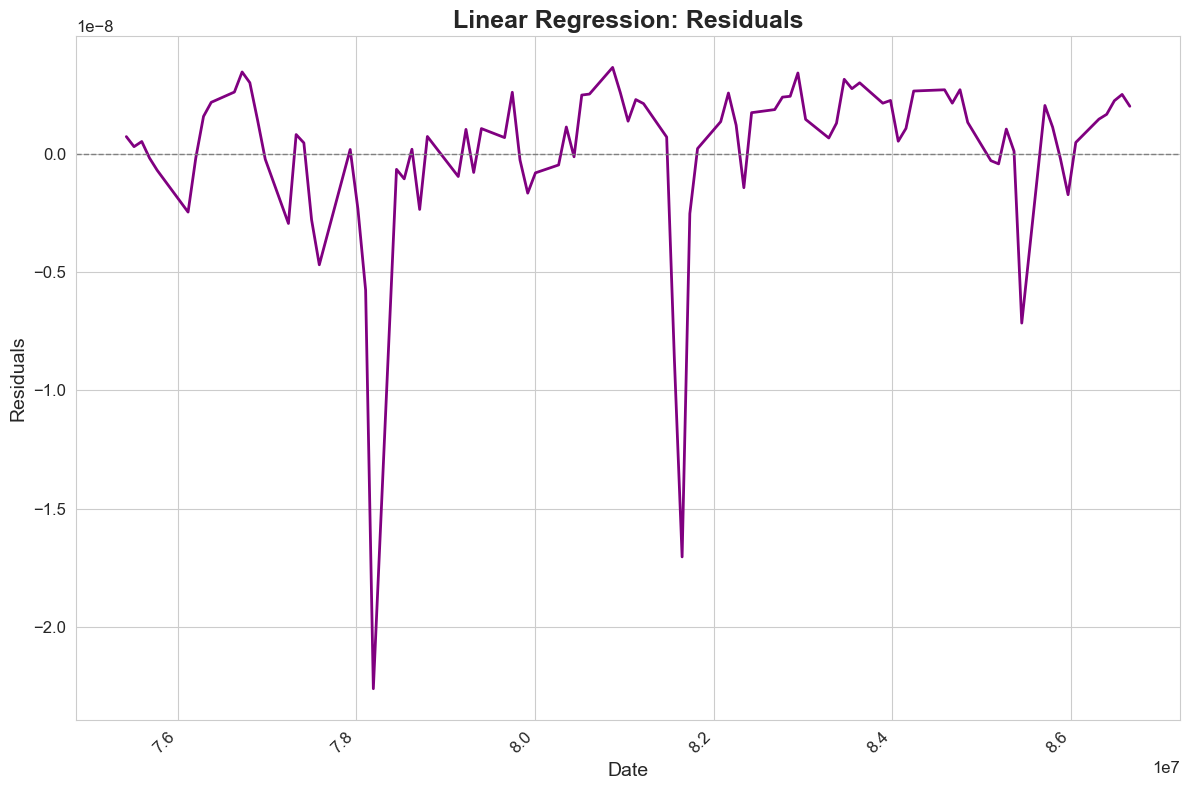

In [329]:
# Calculate residuals for Linear Regression
lin_test_residuals = y_test - lin_test_preds

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Plot residuals with color gradient based on magnitude
plt.plot(test_dates, lin_test_residuals, color='purple', linewidth=2)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Add title, labels, and legend
plt.title('Linear Regression: Residuals', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Add additional visual enhancements
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Line-scatter plot of the residuals (prediction errors) for Random Forest Regression model:**

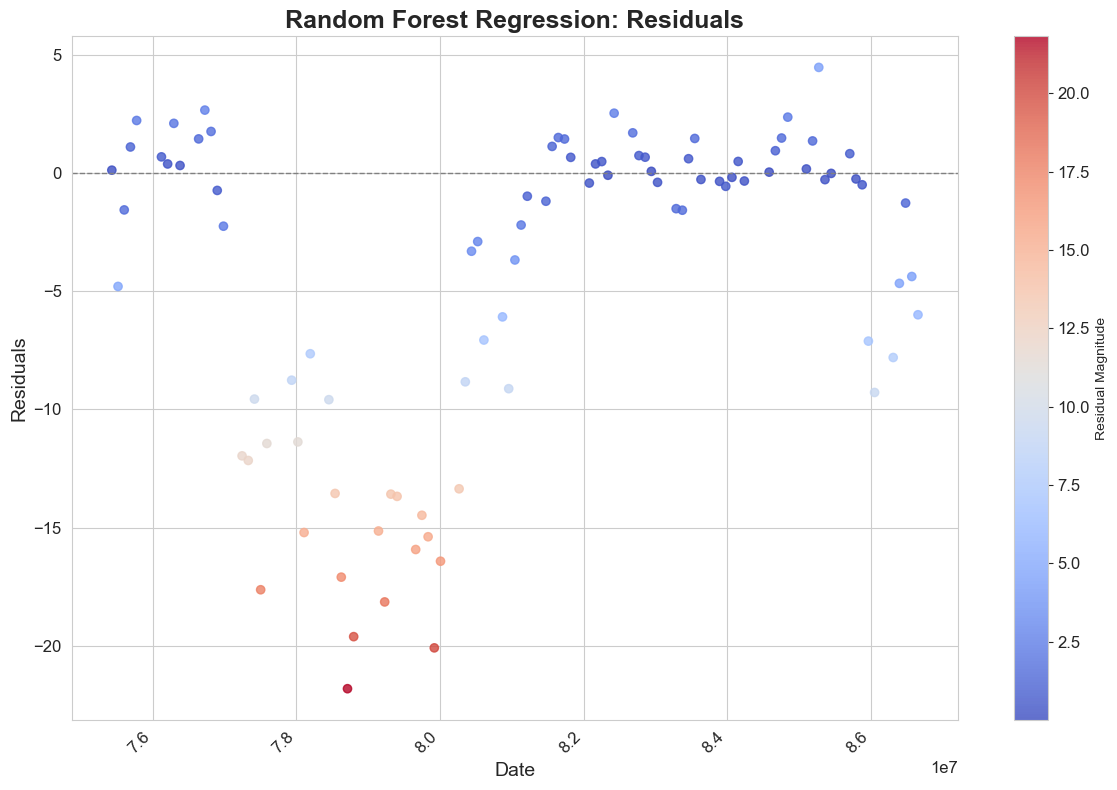

In [330]:

# Calculate residuals for Random Forest Regression
rf_test_residuals = y_test - rf_test_preds

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Plot residuals with color gradient based on magnitude
plt.scatter(test_dates, rf_test_residuals, c=np.abs(rf_test_residuals), cmap='coolwarm', alpha=0.8)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Add title, labels, and colorbar
plt.title('Random Forest Regression: Residuals', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.colorbar(label='Residual Magnitude')

# Add additional visual enhancements
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
